In [1]:
## 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv('./data/train.csv')
train.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


# 0. 데이터 정제 

In [3]:
## 결측값 확인 >> 없음
train.info()
## 중복값 확인 >> 없음 
train[train.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)


In [4]:
## 열이름바꾸기 
train.rename(columns={'supply(kg)': 'supply', 'price(원/kg)': 'price'},inplace=True)

# 1. EDA

In [5]:
train.describe()

,supply,price
count,5.939700e+04,59397.000000
mean,1.189453e+04,1131.680674
std,5.226400e+04,2029.941445
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,3.800000e+03,1519.000000
max,1.222800e+06,20909.000000


In [6]:
train['item'].value_counts()

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [7]:
train['corporation'].value_counts()

corporation
A    13707
E    13707
D    12184
C     9138
B     7615
F     3046
Name: count, dtype: int64

In [8]:
train['location'].value_counts()

location
J    35029
S    24368
Name: count, dtype: int64

In [9]:
display(train.groupby('item')[['price']].agg(['mean','var']))
train.groupby('location')[['price']].agg(['mean','var'])

price              
             mean           var
item                           
BC     910.196615  2.022506e+06
CB     152.187131  1.190616e+05
CR     273.118938  4.006003e+05
RD     187.073539  1.282716e+05
TG    3177.442022  7.869372e+06

price              
                mean           var
location                          
J         1062.35148  3.838061e+06
S         1231.34139  4.510234e+06

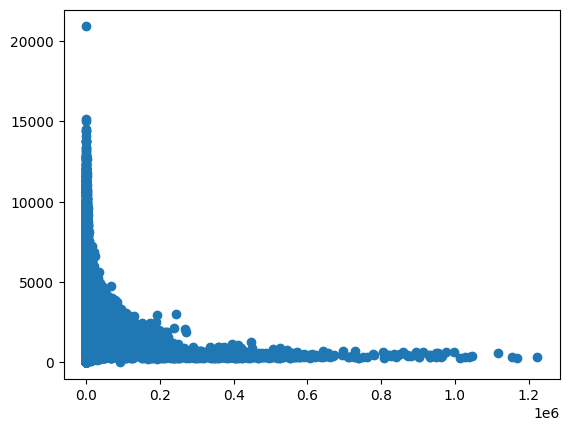

In [11]:
## 상관관계가 크게 없는 것으로 보임 
plt.scatter(train['supply'], train['price']) 

### 년월별 / 카테고리별 가격의 평균의 시계열성 확인 


In [12]:
train_01 = train.copy()
train_01

,ID,timestamp,item,corporation,location,supply,price
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [13]:
train_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply       59397 non-null  float64
 6   price        59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [14]:
## timestamp 을 datetime 형태로 바꾸어주기 
train_01['timestamp'] = pd.to_datetime(train_01['timestamp'])
train_01['년월'] = train_01['timestamp'].dt.strftime('%Y-%m')

In [15]:
## 그룹별 월펼 가격 평균 구해가 

target = train_01.groupby(['년월','item'])['price'].mean().unstack()
target.iloc[:,0]
target


item,BC,CB,CR,RD,TG
년월,,,,,
2019-01,1278.086022,199.554839,519.852535,239.330645,1485.383871
2019-02,1152.563492,186.300000,383.061224,236.875000,1948.453571
2019-03,1772.620072,237.670968,339.935484,242.185484,3181.496774
2019-04,2288.400000,170.046667,331.233333,265.545833,3003.973333
2019-05,658.265233,55.593548,34.792627,286.717742,5209.012903
2019-06,4.800000,5.420000,0.000000,121.695833,4849.870000
2019-07,0.000000,0.000000,0.000000,5.919355,4497.993548
2019-08,0.000000,0.000000,0.000000,1.814516,4203.967742
2019-09,0.000000,0.000000,0.000000,0.000000,3421.206667


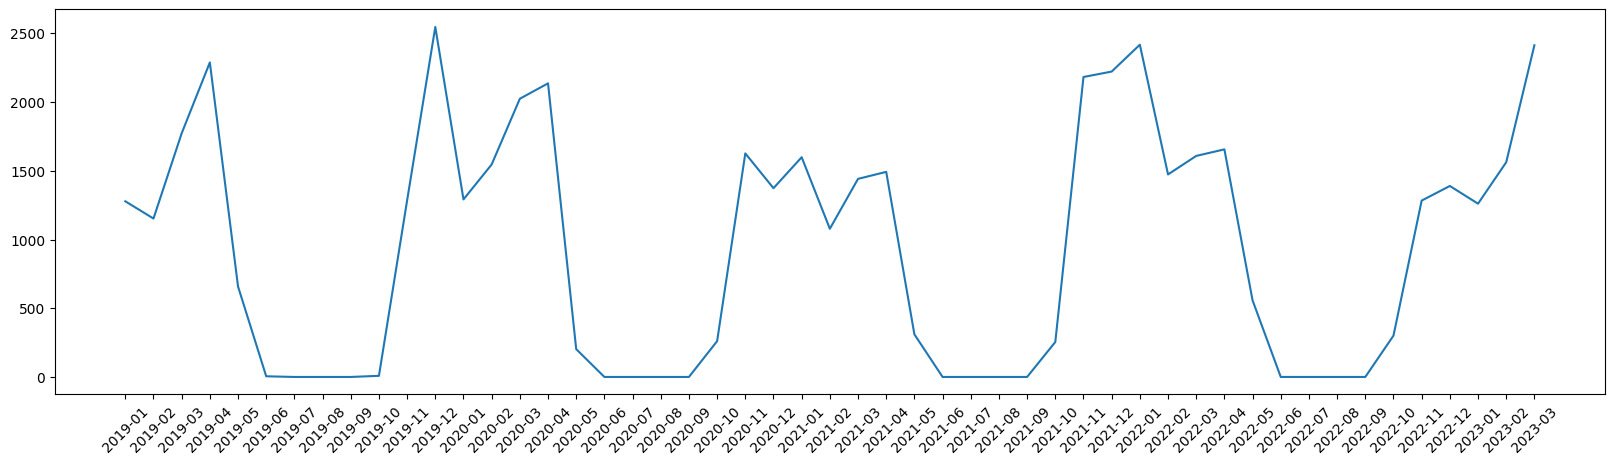

In [16]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(target.index, target.iloc[:,0])


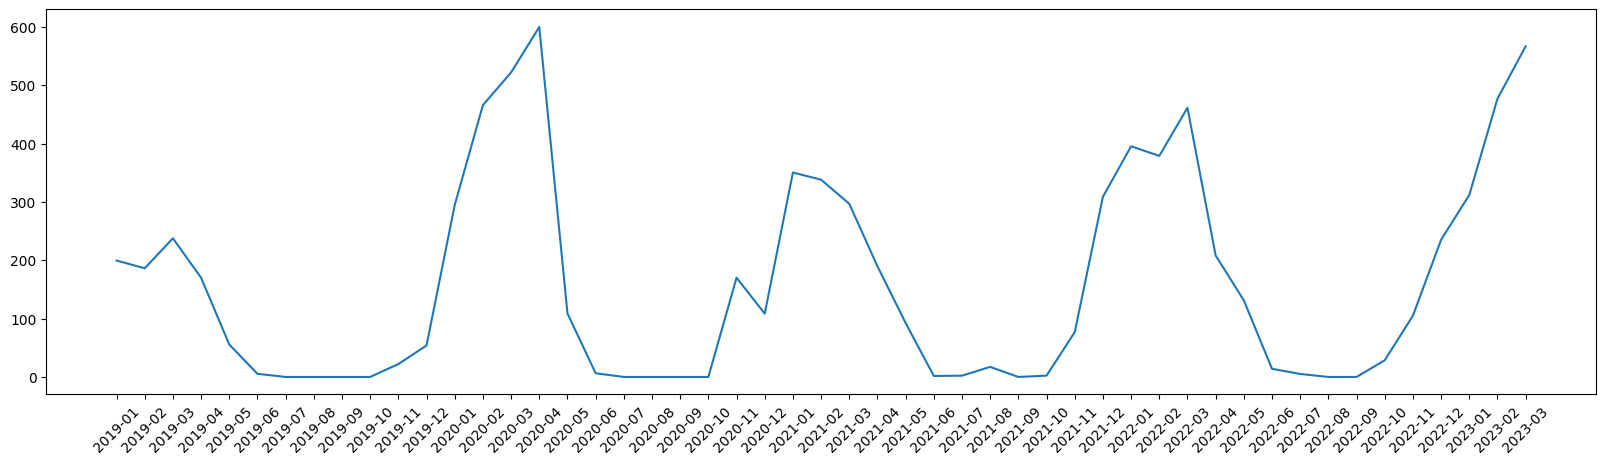

In [17]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(target.index, target.iloc[:,1])

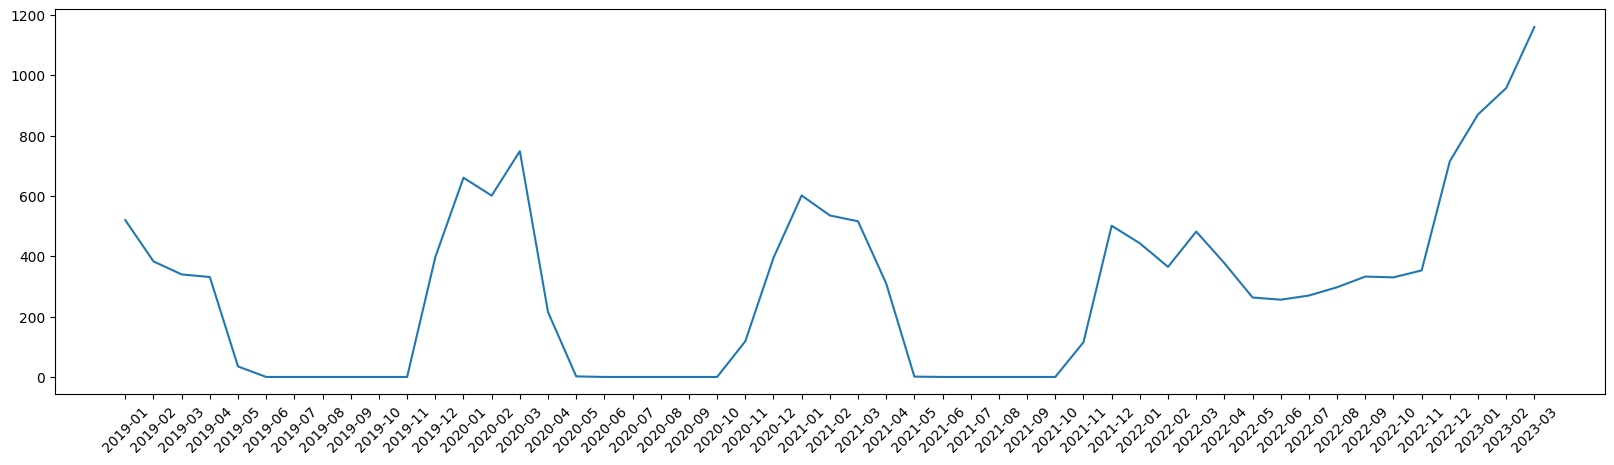

In [18]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(target.index, target.iloc[:,2])

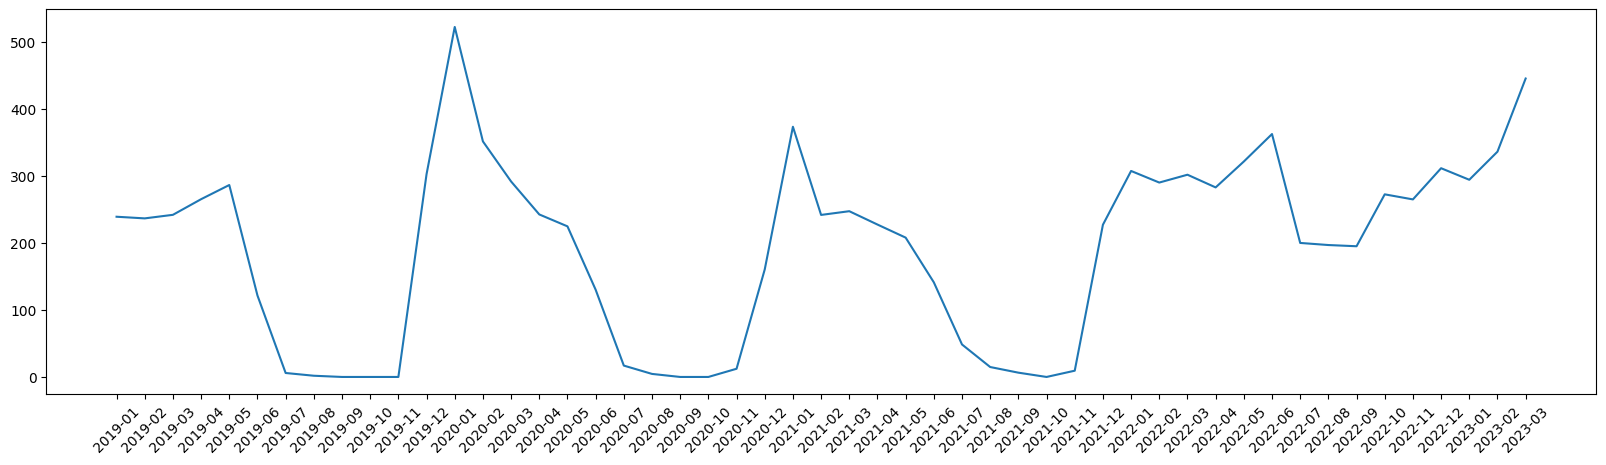

In [19]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(target.index, target.iloc[:,3])

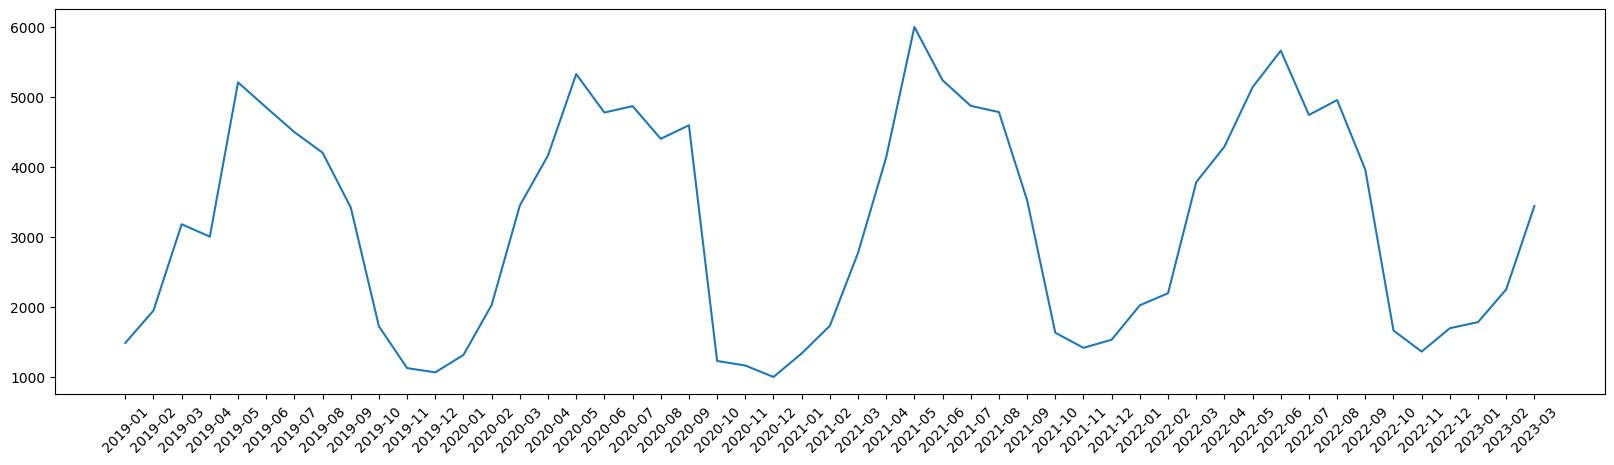

In [20]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(target.index, target.iloc[:,4])

- 계절성이 있는 데이터로 보임 

In [23]:
train_01.drop(columns=['ID'])

,timestamp,item,corporation,location,supply,price,년월
0,2019-01-01,TG,A,J,0.0,0.0,2019-01
1,2019-01-02,TG,A,J,0.0,0.0,2019-01
2,2019-01-03,TG,A,J,60601.0,1728.0,2019-01
3,2019-01-04,TG,A,J,25000.0,1408.0,2019-01
4,2019-01-05,TG,A,J,32352.0,1250.0,2019-01
...,...,...,...,...,...,...,...
59392,2023-02-27,RD,F,J,452440.0,468.0,2023-02
59393,2023-02-28,RD,F,J,421980.0,531.0,2023-02
59394,2023-03-01,RD,F,J,382980.0,574.0,2023-03
59395,2023-03-02,RD,F,J,477220.0,523.0,2023-03


# 02 데이터 전처리

In [ ]:
#  예측 분석이므로 인코딩 필요함 ㅎㅎ 

from sklearn.preprocessing import OneHotEncoder
from sk
